In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score ,accuracy_score


In [3]:
data = pd.read_csv('C:\python\data_set\creditcard.csv')

### 1. Display Top 5 Rows of The Dataset

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 2. Check Last 5 Rows of The Dataset

In [5]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [6]:
data.shape

(284807, 31)

In [7]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 284807
Number of Columns 31


### 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Get some basic summary stats


In [9]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### 5. Check Null Values In The Dataset

In [10]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
#data = data.drop(['Time'],axis=1)

In [14]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [112]:
print(X_train.shape)
print(list(X_train.columns))


(453204, 30)
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [15]:
data.shape

(284807, 31)

In [16]:
data.duplicated().sum()

1081

In [17]:
data = data.drop_duplicates()

In [18]:
data.duplicated().sum()

0

In [19]:
data.shape

(283726, 31)

### 6. Not Handling Imbalanced

In [20]:
data['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [21]:
import seaborn as sns

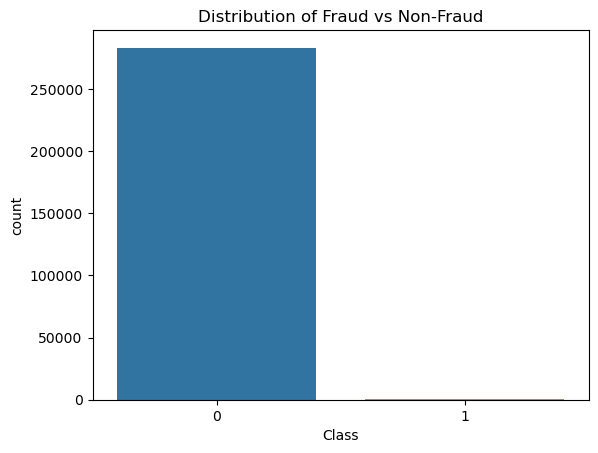

In [22]:
sns.countplot(data=data, x="Class")
plt.title("Distribution of Fraud vs Non-Fraud")
plt.show()

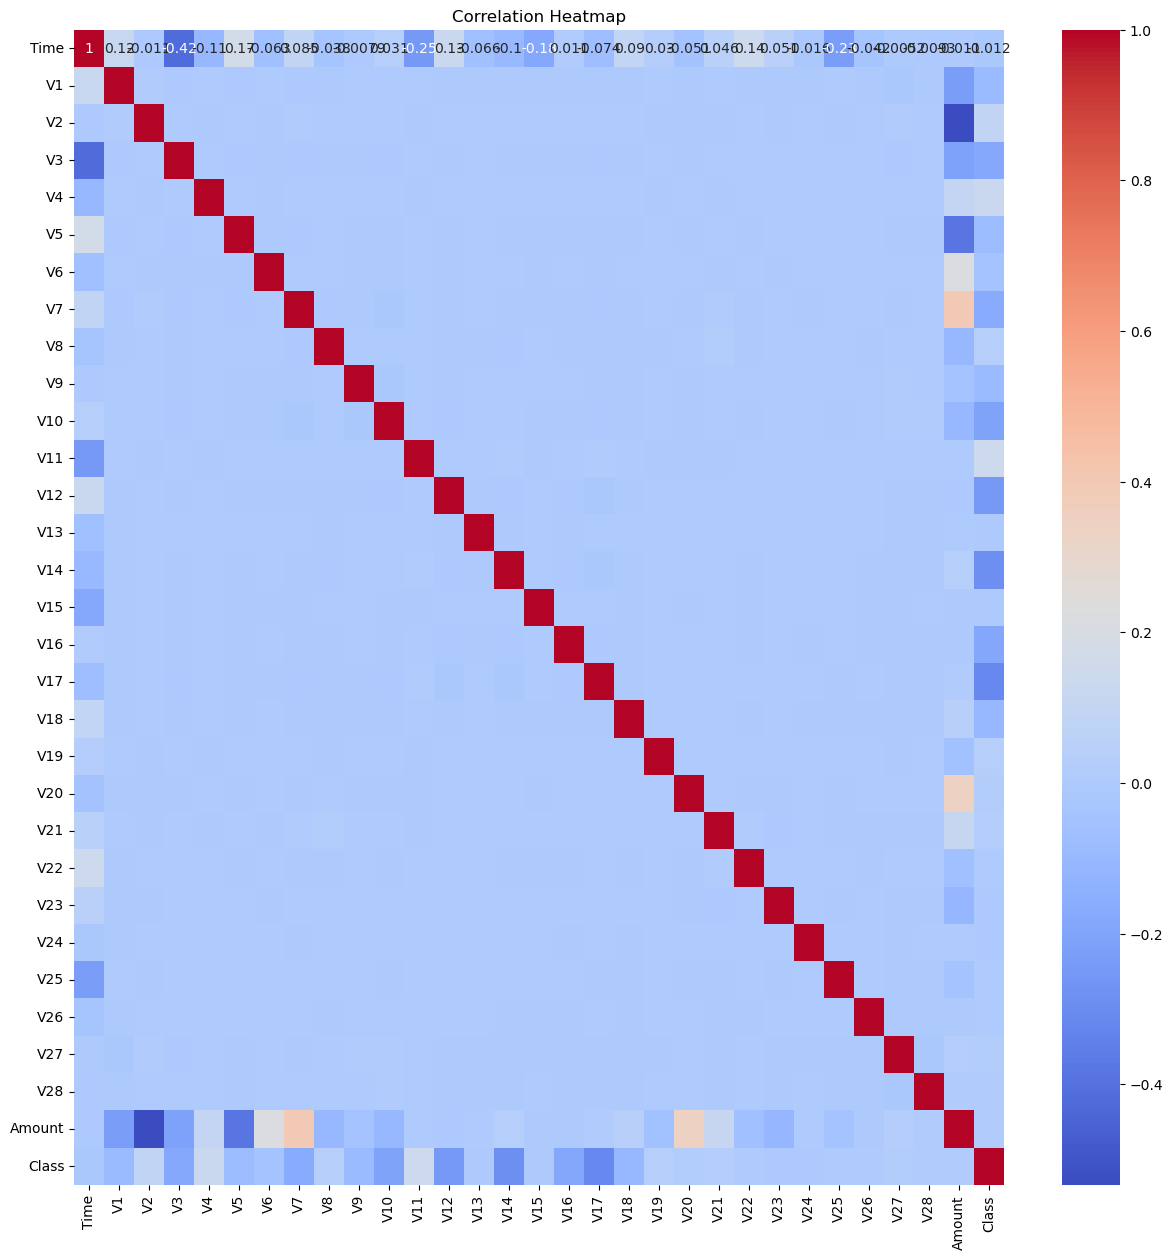

In [23]:
# Correlation heatmap
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), cmap="coolwarm", annot= True)
plt.title("Correlation Heatmap")
plt.show()


c:\Users\omare\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


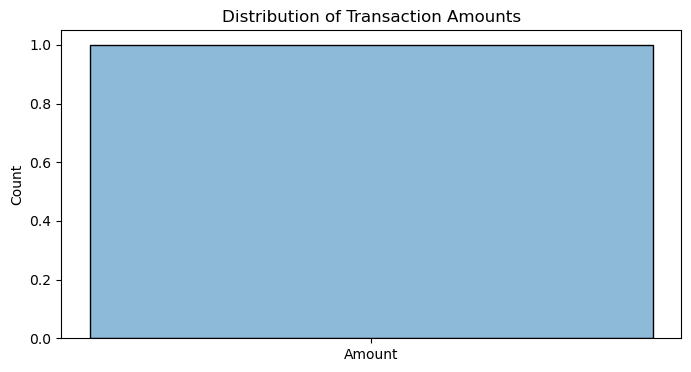

In [24]:
plt.figure(figsize=(8,4))
sns.histplot(data=["Amount"], bins=100, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.show()

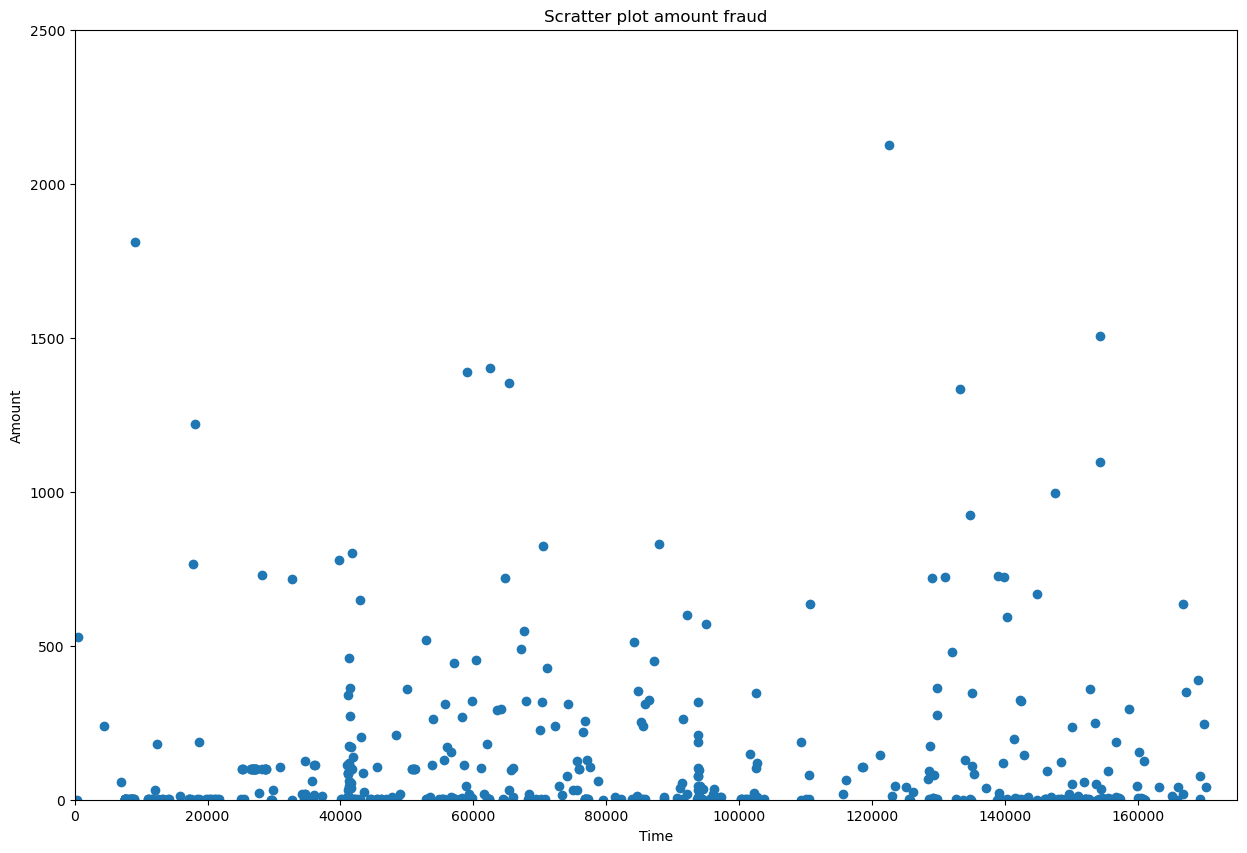

In [25]:
df_fraud = data[data['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()


c:\Users\omare\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\omare\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\omare\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


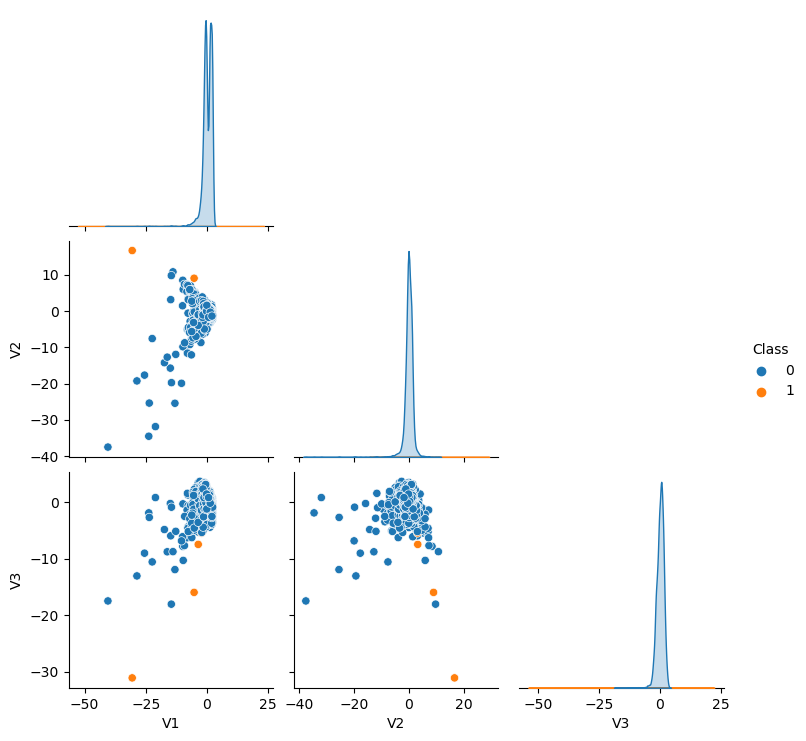

In [26]:
sample_df = data.sample(5000, random_state=42)  
sns.pairplot(sample_df[["V1","V2","V3","Class"]], hue="Class", corner=True)
plt.show()

In [111]:
# Use input_data if available, otherwise fall back to the main 'data' DataFrame
try:
	df = input_data
except NameError:
	df = data

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Data types:", df.dtypes)

Shape: (283726, 31)
Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
Data types: Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [ ]:
#sc = StandardScaler()
#data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [28]:
X = data.drop('Class',axis=1)
y = data['Class']

In [113]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [114]:
X.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [115]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

### 8. Splitting The Dataset Into The Training Set And Test Set

In [116]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                  random_state=42)

In [117]:
log = LogisticRegression()
log.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [118]:
pred = log.predict(X_test)

In [119]:
print(f1_score(y_test,pred))

0.684931506849315


### 9. Handling Imbalanced Dataset

In [120]:
# Undersampling
# Oversampling

### Undersampling

In [121]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [122]:
normal.shape

(283253, 31)

In [123]:
fraud.shape

(473, 31)

In [124]:
normal_sample=normal.sample(n=473)

In [125]:
normal_sample.shape

(473, 31)

In [126]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [127]:
new_data['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [128]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,119140.0,2.021806,0.022007,-1.748483,1.215447,0.437126,-0.696914,0.361063,-0.112856,0.329854,...,0.047777,0.233207,-0.019300,-0.456236,0.393168,-0.477688,-0.033199,-0.082022,-0.349333,0
1,14065.0,-0.652782,0.541716,1.211630,-0.862459,0.877975,0.906071,-0.096534,0.223404,1.147423,...,-0.277372,-0.701365,-0.190718,-1.751744,-0.388722,0.804387,-0.302746,0.056651,-0.333399,0
2,64033.0,0.931645,-0.570471,0.210301,0.177200,-0.874989,-0.899915,0.038475,-0.088815,0.062580,...,0.164348,0.058272,-0.159773,0.591365,0.226516,1.027735,-0.125661,0.017857,0.293641,0
3,146238.0,2.059529,0.060552,-1.852741,0.216731,0.612468,-0.350598,0.037720,-0.034650,0.341112,...,-0.344438,-0.945853,0.286955,0.085072,-0.255080,0.179711,-0.070405,-0.045728,-0.348175,0
4,167703.0,1.609741,-0.142853,-0.339960,3.528133,0.263730,1.246063,-0.371062,0.266206,-0.819657,...,0.295405,0.516748,0.016009,0.081980,-0.237930,-0.034814,-0.024075,-0.013073,0.250509,0


In [129]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

In [130]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                  random_state=42)

### 10. Logistic Regression

In [131]:
log = LogisticRegression()
log.fit(X_train,y_train)

c:\Users\omare\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [132]:
y_pred1 = log.predict(X_test)

In [133]:
accuracy_score(y_test,y_pred1)

0.9315789473684211

In [134]:
cm = confusion_matrix(y_test, y_pred1)
cm

array([[83,  5],
       [ 8, 94]], dtype=int64)

In [135]:
precision_score(y_test,y_pred1)

0.9494949494949495

In [136]:
recall_score(y_test,y_pred1)

0.9215686274509803

In [137]:
f1_score(y_test,y_pred1)

0.9353233830845771

### 11. Decision Tree Classifier

In [138]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [139]:
y_pred2 = dt.predict(X_test)

In [140]:
accuracy_score(y_test,y_pred2)

0.9315789473684211

In [141]:
cm = confusion_matrix(y_test,y_pred2)
cm

array([[84,  4],
       [ 9, 93]], dtype=int64)

In [142]:
precision_score(y_test,y_pred2)

0.9587628865979382

In [143]:
recall_score(y_test,y_pred2)

0.9117647058823529

In [144]:
f1_score(y_test,y_pred2)

0.9346733668341709

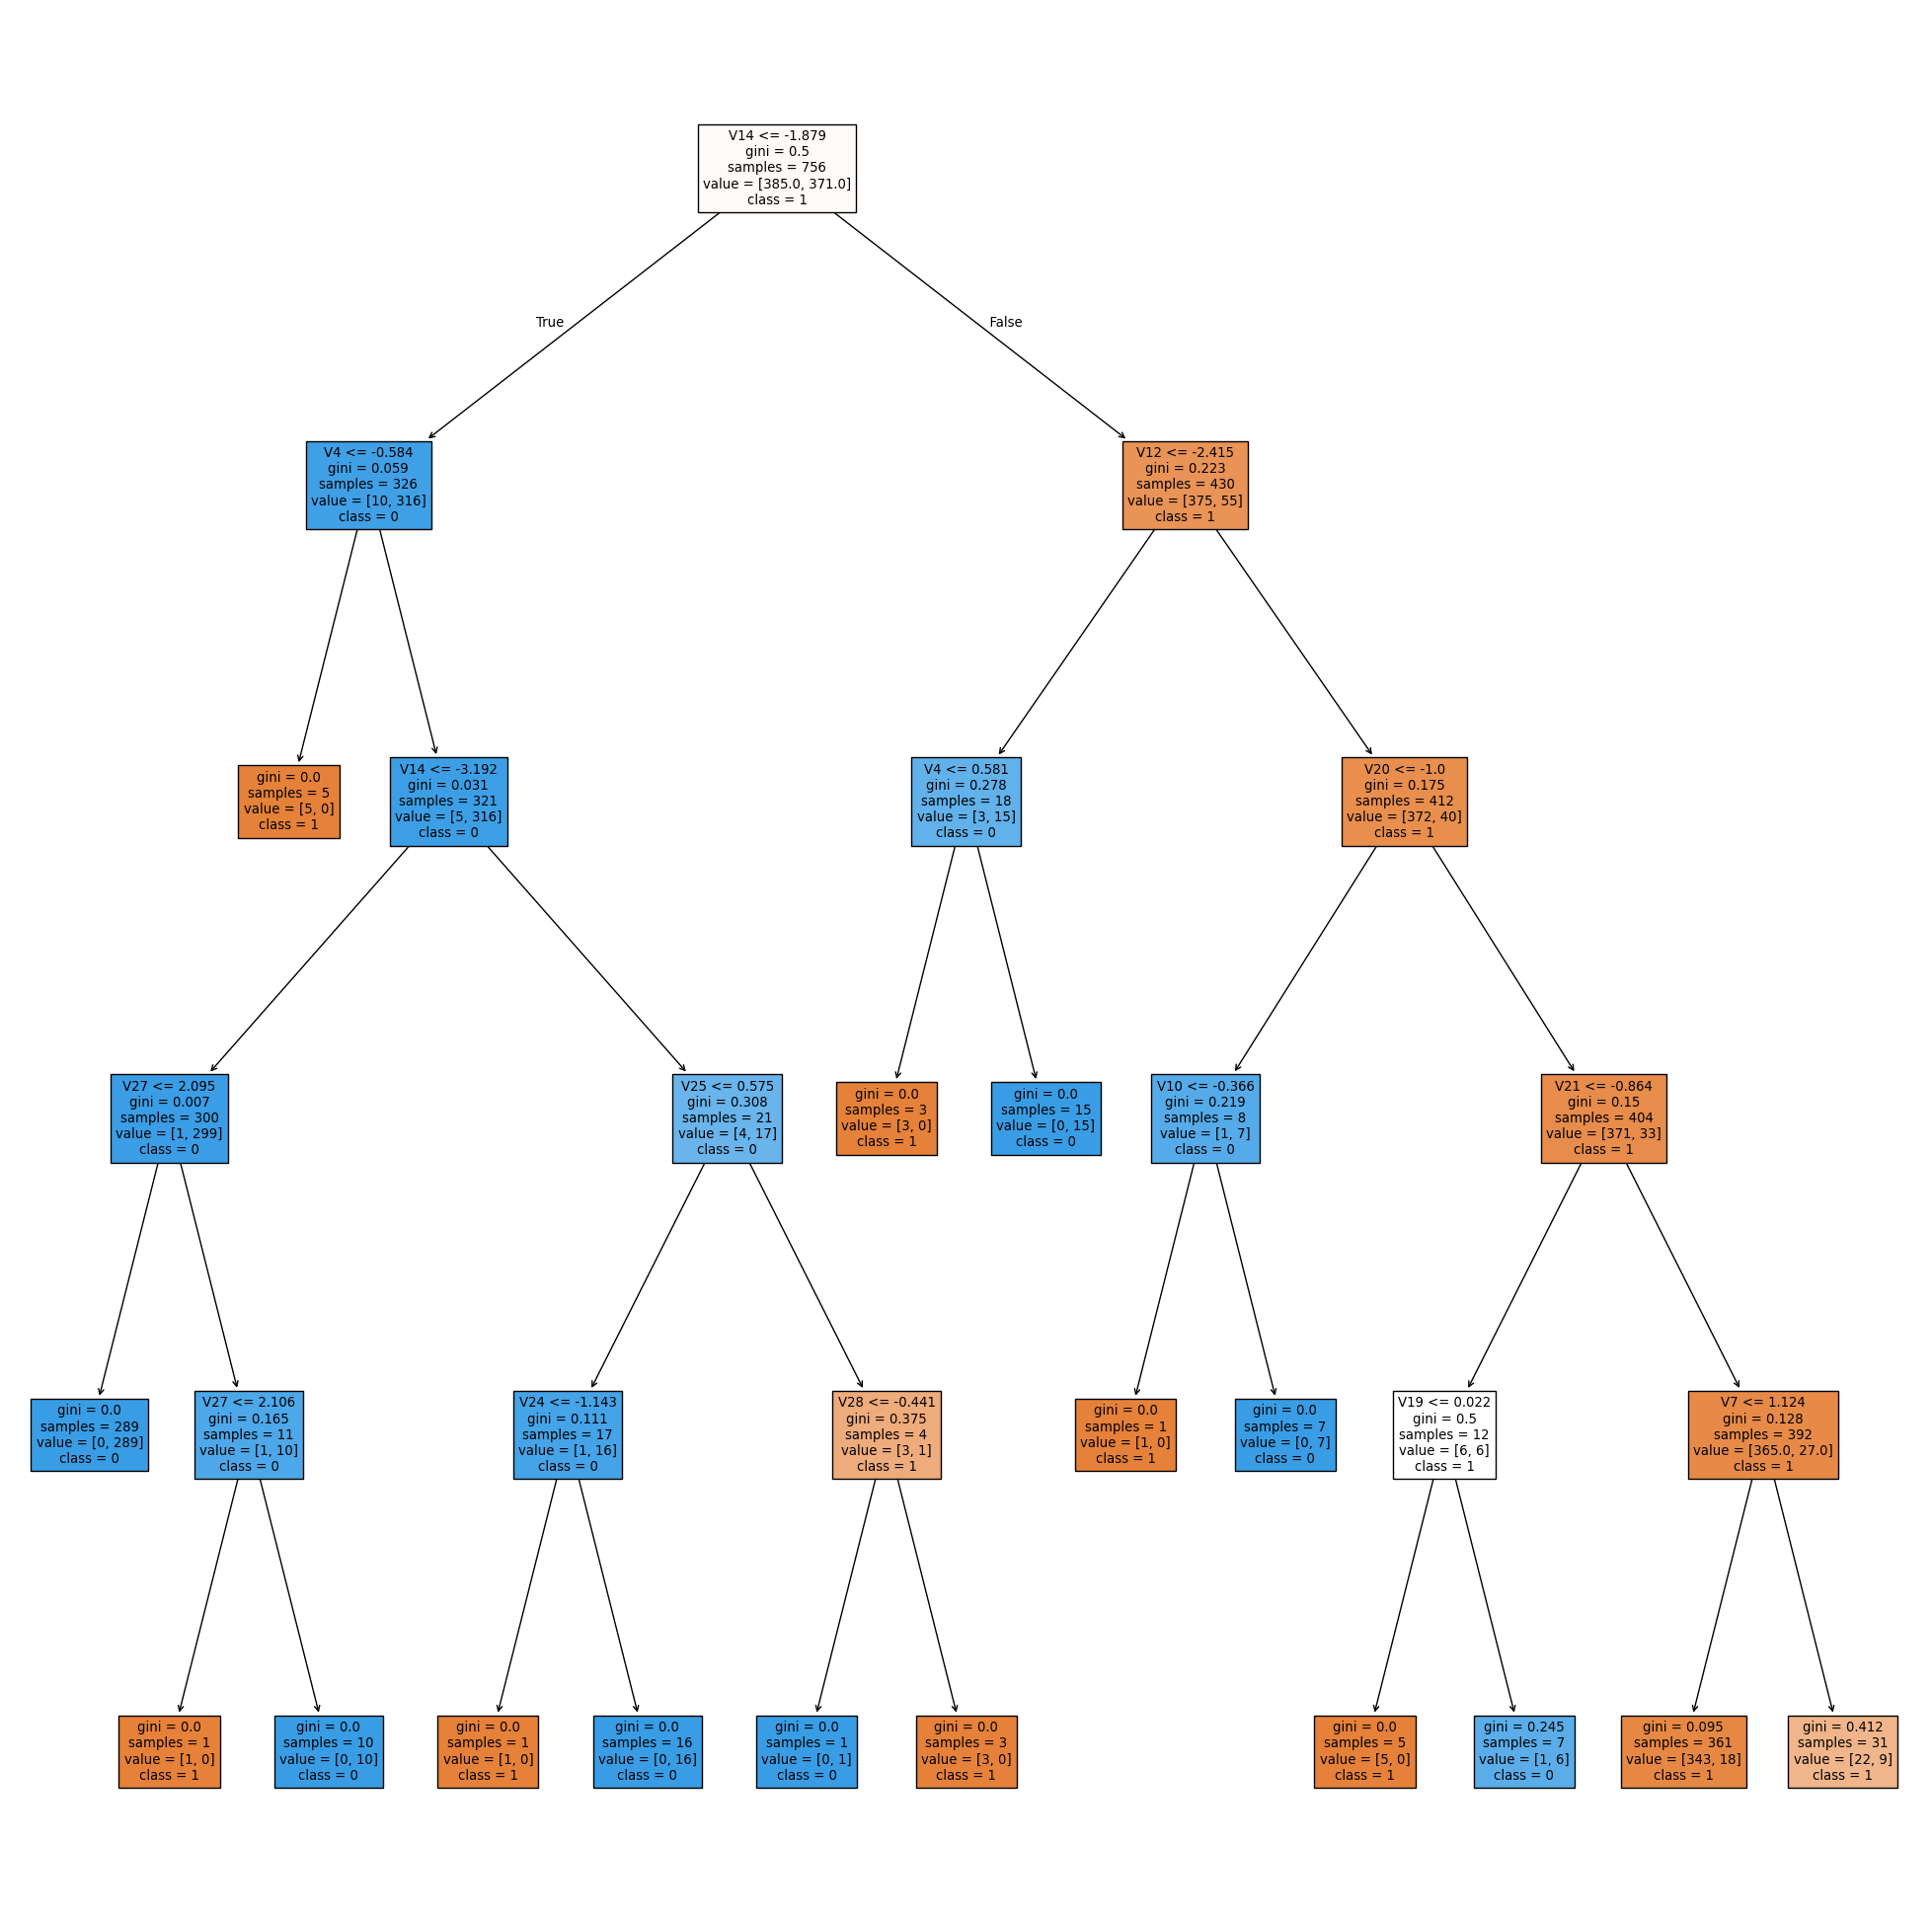

In [145]:
plt.figure(figsize=(25,25))
dec_tree = plot_tree(dt,
                        feature_names=X.columns,
                        class_names=['1','0'],
                        filled=True,)
plt.savefig("one.png")


### 12. Naive Bayes classifier

In [146]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)


,priors,None
,var_smoothing,1e-09


In [147]:
y_pred3 = nb_classifier.predict(X_test)

In [148]:
accuracy_score(y_test,y_pred3)

0.8421052631578947

In [149]:
cm = confusion_matrix(y_test,y_pred3)
cm

array([[86,  2],
       [28, 74]], dtype=int64)

In [150]:
precision_score(y_test,y_pred3)

0.9736842105263158

In [151]:
recall_score(y_test,y_pred3)

0.7254901960784313

In [152]:
f1_score(y_test,y_pred3)

0.8314606741573034

In [153]:
final_data = pd.DataFrame({'Models':['LR','DT','Nb'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                      accuracy_score(y_test,y_pred2)*100,
                      accuracy_score(y_test,y_pred3)*100
                    ]})

In [154]:
final_data

,Models,ACC
0,LR,93.157895
1,DT,93.157895
2,Nb,84.210526


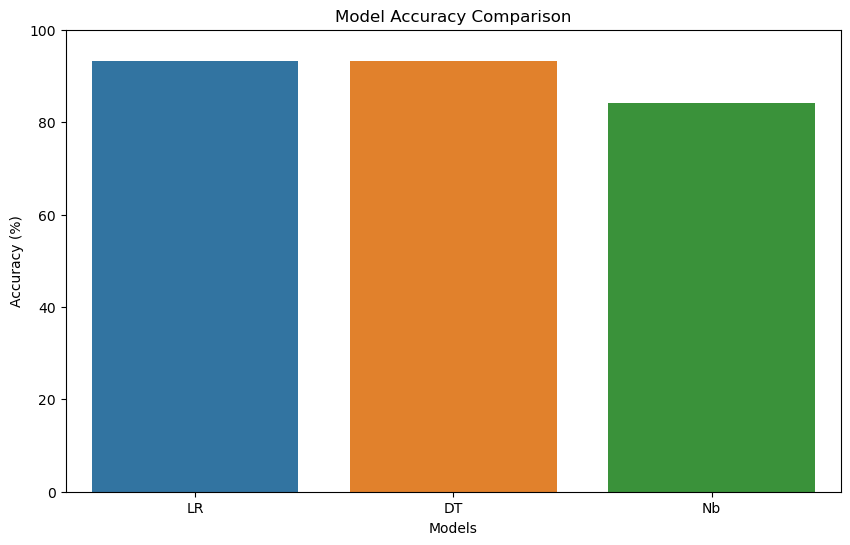

In [155]:
plt.figure(figsize=(10, 6))
sns.barplot(data=final_data, x='Models', y='ACC')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  
plt.show()

### Oversampling

In [156]:
X = data.drop('Class',axis=1)
y = data['Class']

In [157]:
X.shape

(283726, 30)

In [158]:
y.shape

(283726,)

In [159]:
!pip install --upgrade scikit-learn imbalanced-learn



In [160]:
from imblearn.over_sampling import SMOTE

In [161]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [162]:
y_res.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

In [163]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,
                                                  random_state=42)

### 10. Logistic Regression

In [164]:
log = LogisticRegression()
log.fit(X_train,y_train)

c:\Users\omare\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [165]:
y_pred4 = log.predict(X_test)

In [166]:
accuracy_score(y_test,y_pred4)

0.9712361652927574

In [167]:
cm = confusion_matrix(y_test,y_pred4)
cm

array([[55395,  1068],
       [ 2191, 54648]], dtype=int64)

In [168]:
precision_score(y_test,y_pred4)

0.9808313590351067

In [169]:
recall_score(y_test,y_pred4)

0.9614525237952815

In [170]:
f1_score(y_test,y_pred4)

0.9710452667584736

### 11. Decision Tree Classifier

In [171]:
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [172]:
y_pred5 = dt.predict(X_test)

In [173]:
accuracy_score(y_test,y_pred5)

0.9679882085047042

In [174]:
cm = confusion_matrix(y_test,y_pred5)
cm

array([[55569,   894],
       [ 2733, 54106]], dtype=int64)

In [175]:
precision_score(y_test,y_pred5)

0.9837454545454546

In [176]:
recall_score(y_test,y_pred5)

0.9519168176780027

In [177]:
f1_score(y_test,y_pred5)

0.967569452516564

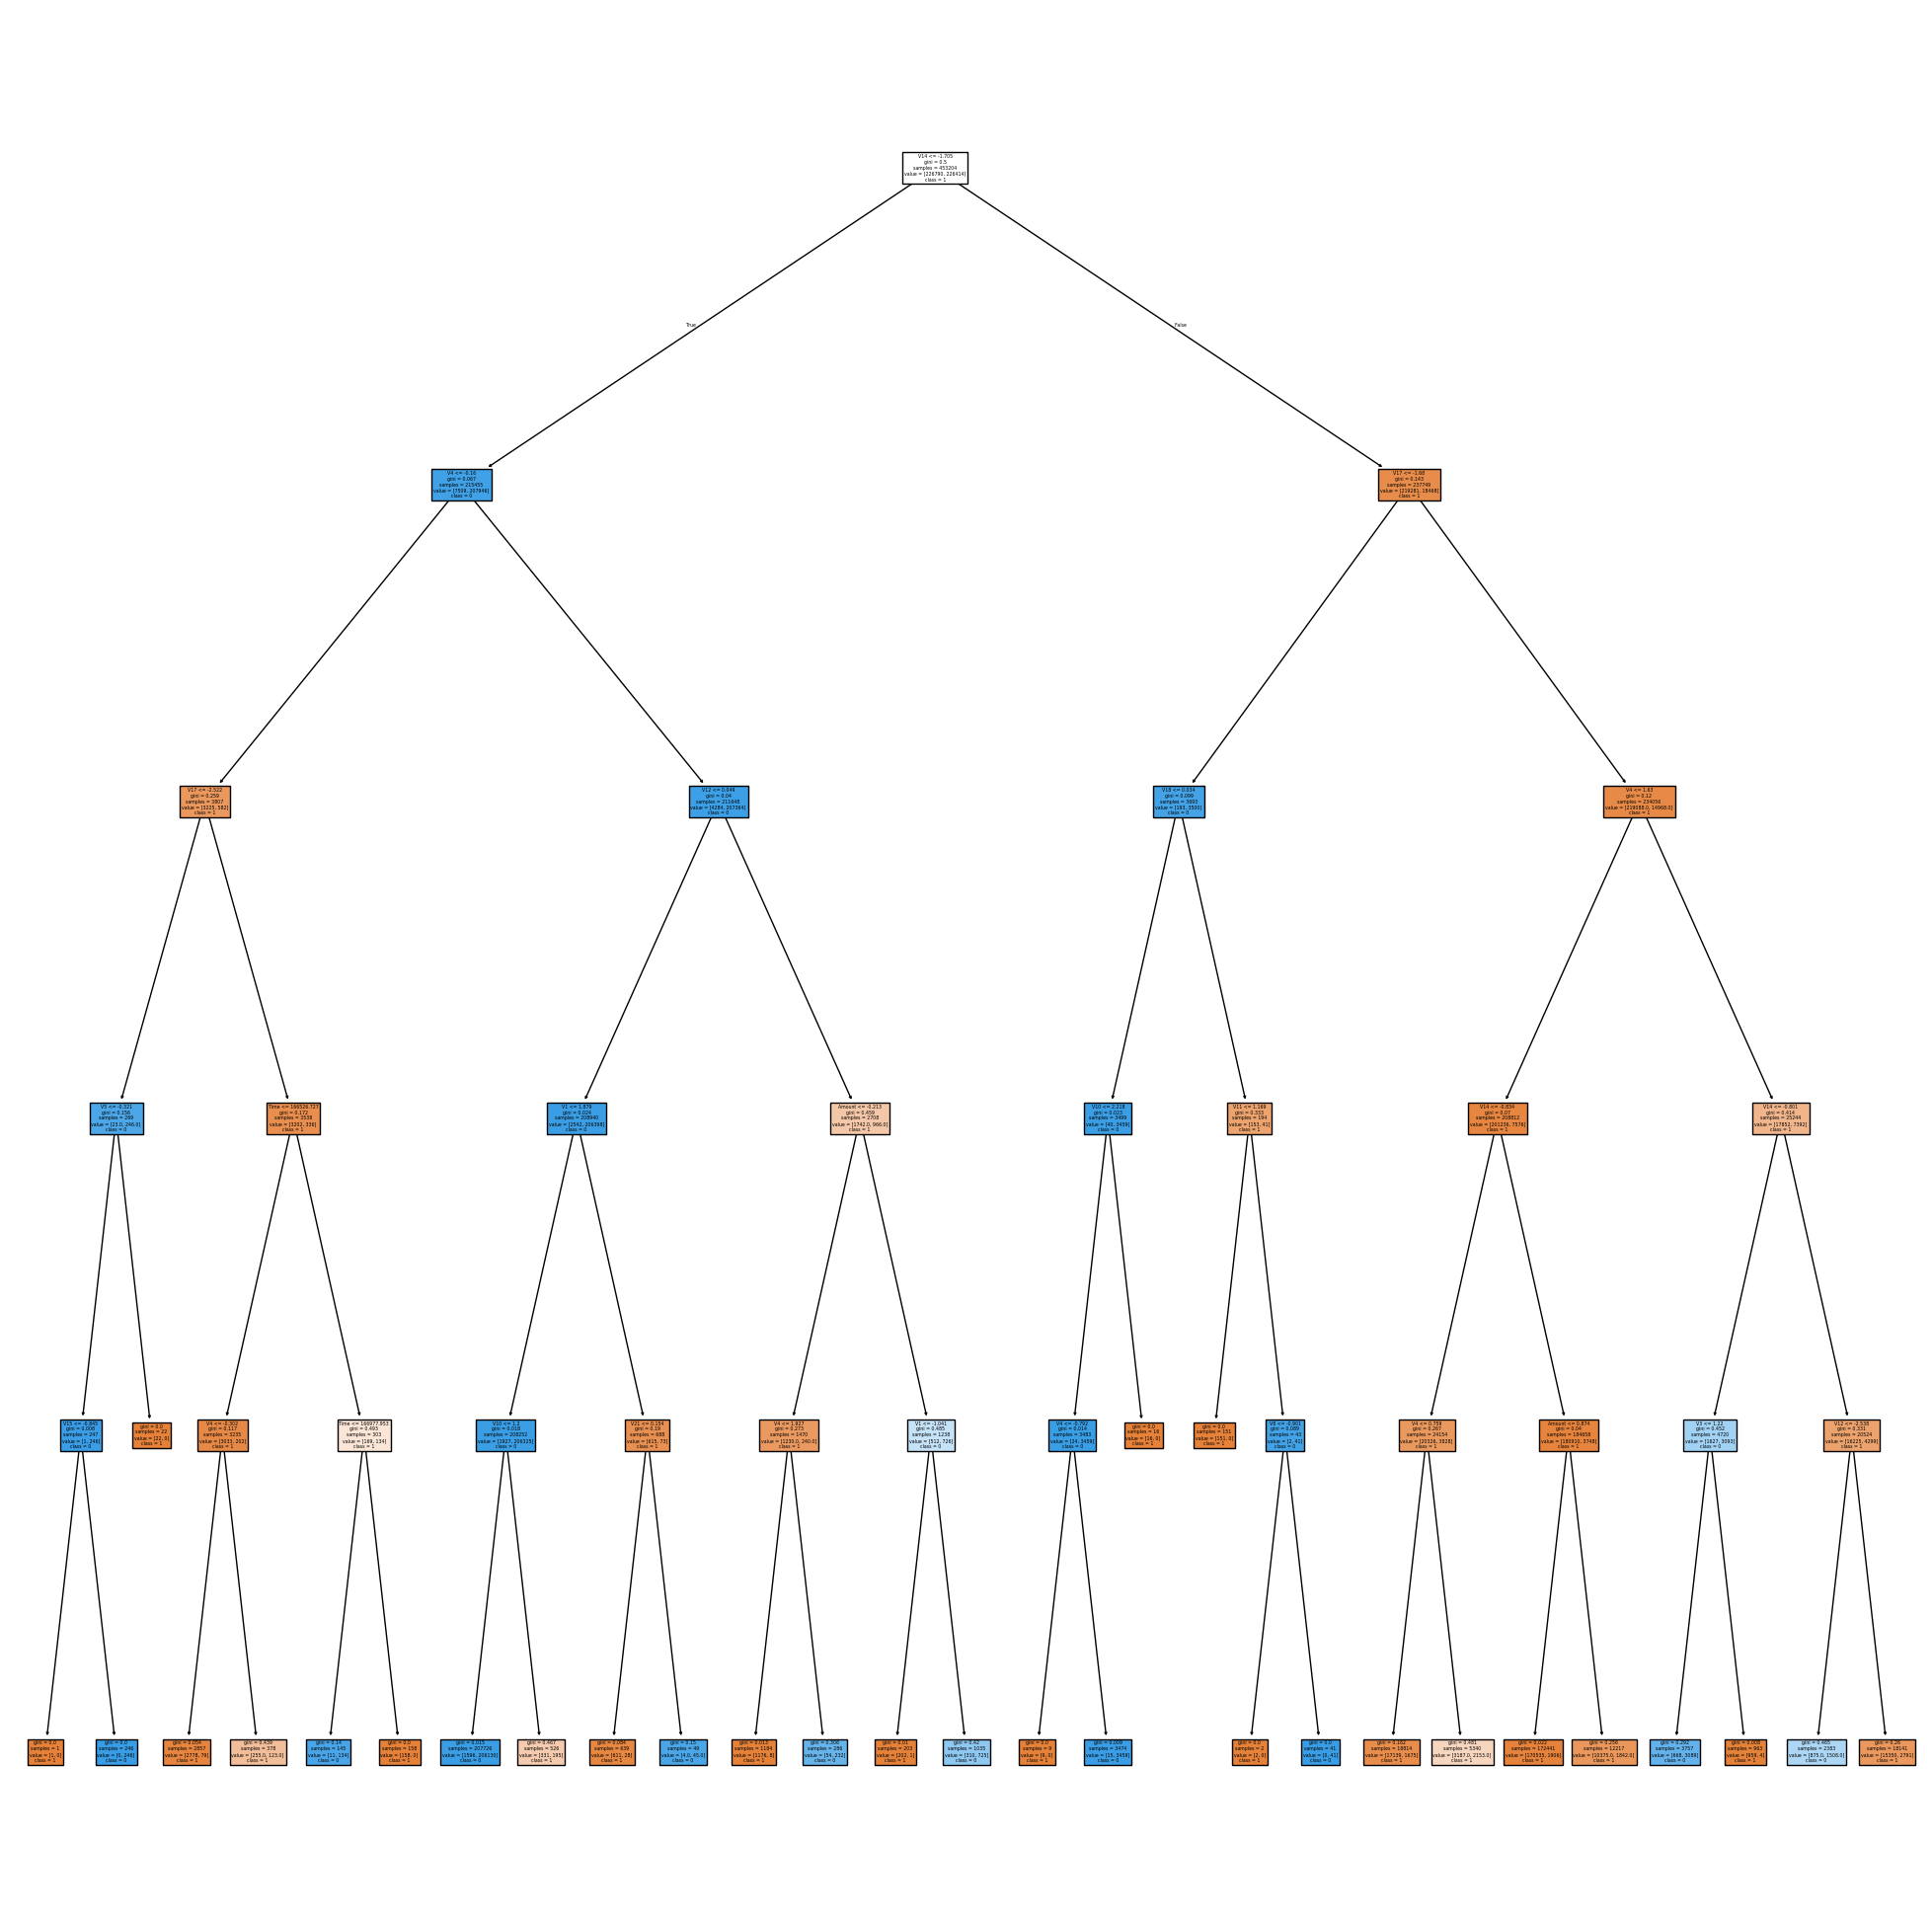

In [178]:
plt.figure(figsize=(25,25))
dec_tree = plot_tree(dt,
                        feature_names=X.columns,
                        class_names=['1','0'],
                        filled=True,)
plt.savefig("one.png")


### 12. Naive Bayes classifier

In [179]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)


,priors,None
,var_smoothing,1e-09


In [180]:
y_pred6 = nb_classifier.predict(X_test)

In [181]:
accuracy_score(y_test,y_pred6)

0.8686607473831001

In [182]:
cm = confusion_matrix(y_test,y_pred6)
cm

array([[56016,   447],
       [14434, 42405]], dtype=int64)

In [183]:
precision_score(y_test,y_pred6)

0.98956874824979

In [184]:
recall_score(y_test,y_pred6)

0.7460546455778603

In [185]:
f1_score(y_test,y_pred6)

0.8507287518431955

In [186]:
final_data = pd.DataFrame({'Models':['LR','DT','Nb'],
              "ACC":[accuracy_score(y_test,y_pred4)*100,
                      accuracy_score(y_test,y_pred5)*100,
                      accuracy_score(y_test,y_pred6)*100
                    ]})

In [187]:
final_data

,Models,ACC
0,LR,97.123617
1,DT,96.798821
2,Nb,86.866075


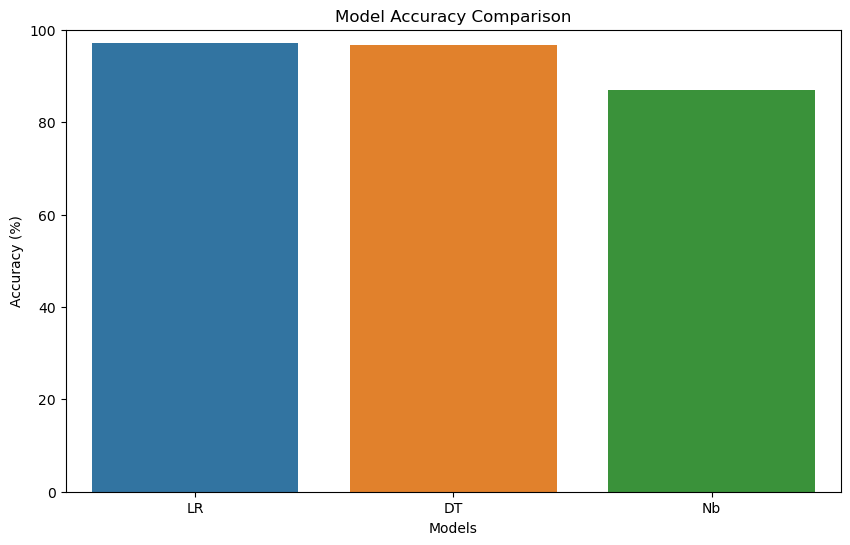

In [188]:
plt.figure(figsize=(10, 6))
sns.barplot(data=final_data, x='Models', y='ACC')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  
plt.show()

In [189]:
import joblib
import os

# تأكد إنك شغال في الفولدر الصحيح
os.chdir(r"C:\python\final")

# احفظ النماذج الثلاثة
joblib.dump(log, "log_model.pkl")
joblib.dump(dt, "dt_model.pkl")
joblib.dump(nb_classifier, "nb_model.pkl")

# لو عندك StandardScaler أو MinMaxScaler، احفظه كمان
joblib.dump( sc, "scaler.pkl")

print("✅ Saved all models and scaler successfully in:", os.getcwd())


✅ Saved all models and scaler successfully in: C:\python\final


In [190]:
test_sample = X.iloc[0:1, :]
scaled_sample = sc.transform(test_sample)
print(log.predict(scaled_sample))


[0]


c:\Users\omare\anaconda4\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
